# SVM Task

Classes: The dataset has two target classes:
Malignant (denoted by 0)
Benign (denoted by 1)

- radius_mean: Mean of distances from the center to points on the perimeter.
- texture_mean: Standard deviation of gray-scale values.
- perimeter_mean: Mean of perimeter values.
- area_mean: Mean of area values.
- smoothness_mean: Mean of local variation in radius lengths.
- compactness_mean: Mean of perimeter^2 / area - 1.0
- concavity_mean: Mean of severity of concave portions of the contour.
- concave points_mean: Mean for the number of concave portions of the contour.
- symmetry_mean: Mean of symmetry.
- fractal_dimension_mean: Mean of the "coastline approximation" - 1.
- radius_se: Standard error for radius.
- texture_se: Standard error for texture.
- perimeter_se: Standard error for perimeter.
- area_se: Standard error for area.
- smoothness_se: Standard error for smoothness.
- compactness_se: Standard error for compactness.
- concavity_se: Standard error for concavity.
- concave points_se: Standard error for concave points.
- symmetry_se: Standard error for symmetry.
- fractal_dimension_se: Standard error for fractal dimension.
- radius_worst: Worst or largest radius value.
- texture_worst: Worst texture value.
- perimeter_worst: Worst perimeter value.
- area_worst: Worst area value.
- smoothness_worst: Worst smoothness value.
- compactness_worst: Worst compactness value.
- concavity_worst: Worst concavity value.
- concave points_worst: Worst concave points value.
- symmetry_worst: Worst symmetry value.
- fractal_dimension_worst: Worst fractal dimension value.

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Assign the correct column names based on the dataset documentation
columns = ['ID', 'Diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Load the dataset and assign these column names
df = pd.read_csv(url, header=None, names=columns)
df.drop(columns=['ID'], inplace=True)


In [5]:
df.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.Diagnosis.value_counts()

Diagnosis
B    357
M    212
Name: count, dtype: int64

In [7]:
df.isna().sum()

Diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [9]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


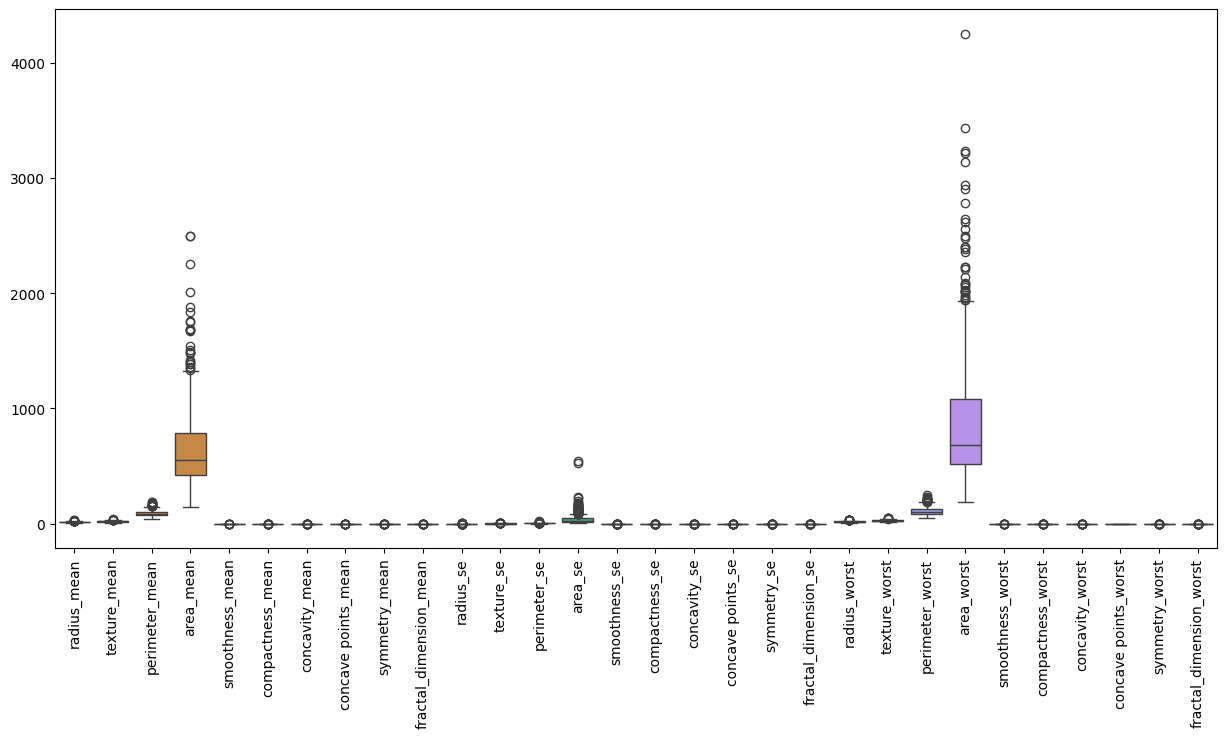

In [10]:
plt.figure(figsize=(15, 7))
sns.boxplot(df)
plt.xticks(rotation =  90)
plt.show()

In [11]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))


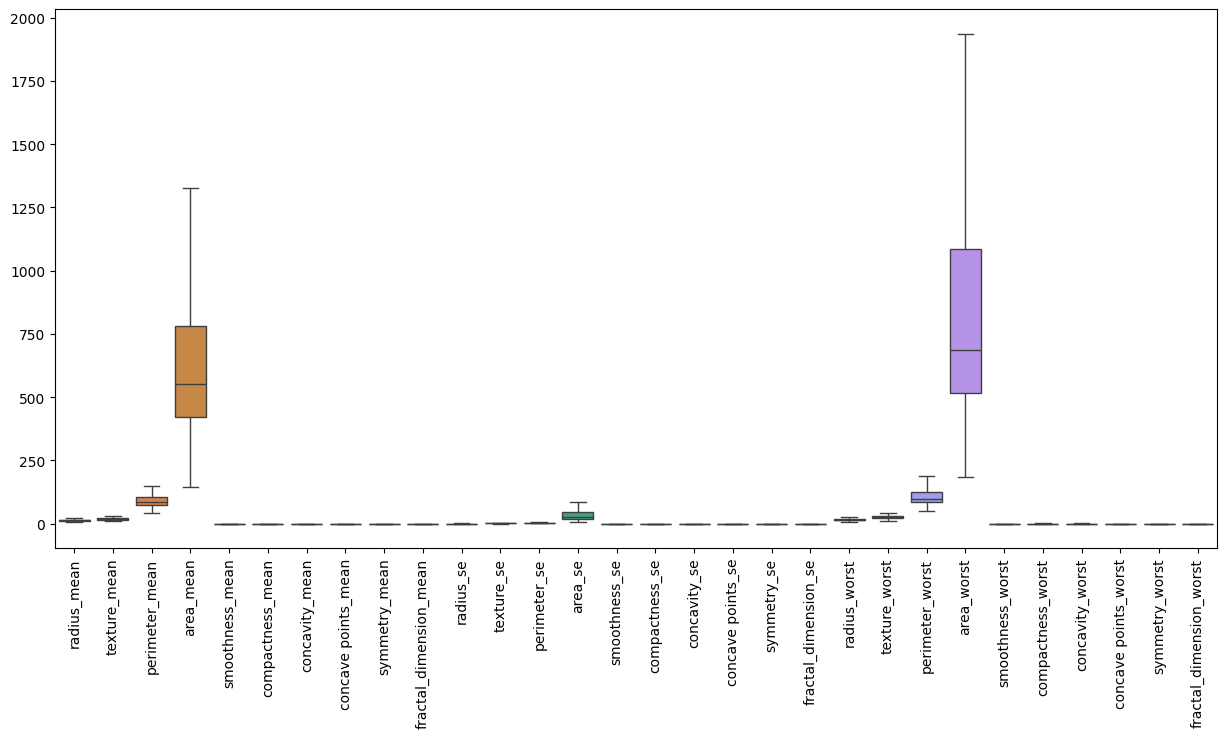

In [12]:
plt.figure(figsize=(15, 7))
sns.boxplot(df)
plt.xticks(rotation =  90)
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
l=LabelEncoder()
df["Diagnosis"]=l.fit_transform(df["Diagnosis"])

In [15]:
df

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,25.380,17.33,184.60,1937.05,0.16220,0.62695,0.7119,0.2654,0.41915,0.11890
1,1,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1937.05,0.12380,0.18660,0.2416,0.1860,0.27500,0.08902
2,1,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.00,0.14440,0.42450,0.4504,0.2430,0.36130,0.08758
3,1,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,14.910,26.50,98.87,567.70,0.19010,0.62695,0.6869,0.2575,0.41915,0.12301
4,1,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.00,0.13740,0.20500,0.4000,0.1625,0.23640,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,1937.05,0.14100,0.21130,0.4107,0.2216,0.20600,0.07115
565,1,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.00,0.11660,0.19220,0.3215,0.1628,0.25720,0.06637
566,1,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.00,0.11390,0.30940,0.3403,0.1418,0.22180,0.07820
567,1,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,...,25.740,39.42,184.60,1821.00,0.16500,0.62695,0.7855,0.2650,0.40870,0.12301


In [16]:
f1="radius_mean"
f2="texture_mean"
p=df[[f1,f2,"Diagnosis"]].head()
p

,radius_mean,texture_mean,Diagnosis
0,17.99,10.38,1
1,20.57,17.77,1
2,19.69,21.25,1
3,11.42,20.38,1
4,20.29,14.34,1


<Axes: xlabel='radius_mean,texture_mean,Diagnosis'>

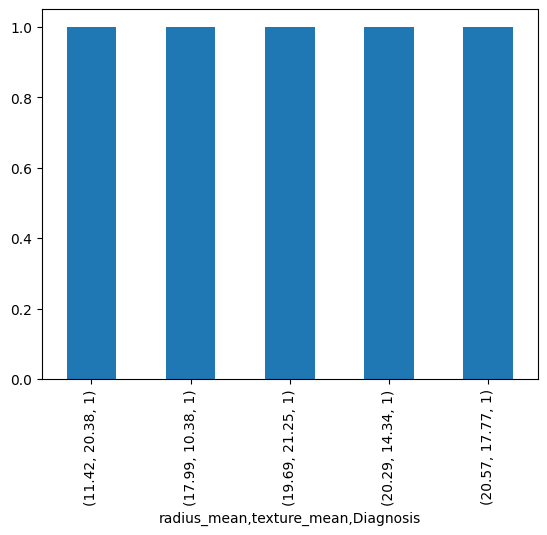

In [17]:
p.value_counts().plot(kind="bar")

In [18]:
from sklearn.model_selection import train_test_split
x=df[[f1,f2]]
y=df["Diagnosis"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42,shuffle=True,stratify=y)

In [19]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain=s.fit_transform(xtrain)
xtest=s.fit_transform(xtest)

In [20]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model=SVC(kernel="linear",C=0.01)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)

0.8421052631578947

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model=LogisticRegression()
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)

0.8771929824561403

Q2

In [22]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"

# Assign the correct column names based on the dataset documentation
columns = ['ID', 'Diagnosis'] + [
    'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
    'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean',
    'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se',
    'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se',
    'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst',
    'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst',
    'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'
]

# Load the dataset and assign these column names
df = pd.read_csv(url, header=None, names=columns)
df.drop(columns=['ID'], inplace=True)


In [23]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    

    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))


In [24]:
from sklearn.preprocessing import LabelEncoder
l=LabelEncoder()
df["Diagnosis"]=l.fit_transform(df["Diagnosis"])


In [25]:
df_sh=df.sample(frac=1,random_state=42).reset_index(drop=True)
df_sh.head()

,Diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0,12.47,18.60,81.09,481.9,0.09965,0.1058,0.08005,0.03821,0.1925,...,14.97,24.64,96.05,677.9,0.1426,0.2378,0.2671,0.10150,0.3014,0.08750
1,1,18.94,21.31,123.60,1130.0,0.09009,0.1029,0.10800,0.07951,0.1582,...,24.86,26.58,165.90,1866.0,0.1193,0.2336,0.2687,0.17890,0.2551,0.06589
2,1,15.46,19.48,101.70,748.9,0.10920,0.1223,0.14660,0.08087,0.1931,...,19.26,26.00,124.90,1156.0,0.1546,0.2394,0.3791,0.15140,0.2837,0.08019
3,0,12.40,17.68,81.47,467.8,0.10540,0.1316,0.07741,0.02799,0.1811,...,12.88,22.91,89.61,515.8,0.1450,0.2629,0.2403,0.07370,0.2556,0.09359
4,0,11.54,14.44,74.65,402.9,0.09984,0.1120,0.06737,0.02594,0.1818,...,12.26,19.68,78.78,457.8,0.1345,0.2118,0.1797,0.06918,0.2329,0.08134


In [26]:
x=df_sh.drop(columns="Diagnosis")
y=df_sh["Diagnosis"]
xtrain,xtemp,ytrain,ytemp=train_test_split(x,y,train_size=400, random_state=42, shuffle=True)
xval, xtest, yval, ytest = train_test_split(xtemp, ytemp, train_size=100, random_state=42, shuffle=True)
print(xtrain.shape,xval.shape,xtest.shape)

(400, 30) (100, 30) (69, 30)


In [27]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain=s.fit_transform(xtrain)
xval=s.transform(xval)
xtest=s.transform(xtest)

<Axes: >

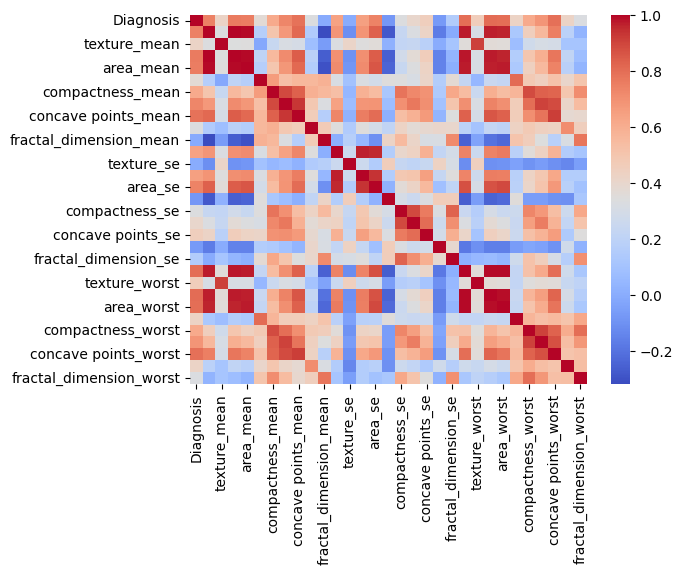

In [28]:
corr=df.corr()
sns.heatmap(corr,annot=False, cmap='coolwarm',)

In [29]:
f1 = "area_mean"
f2 = "texture_mean"
x=df[[f1,f2]]
y=df["Diagnosis"]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,train_size=0.2, random_state=42, shuffle=True)
s=StandardScaler()
xtrain=s.fit_transform(xtrain)
xtest=s.transform(xtest)


In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
model= SVC(kernel="linear",C=0.01)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)

0.8399122807017544

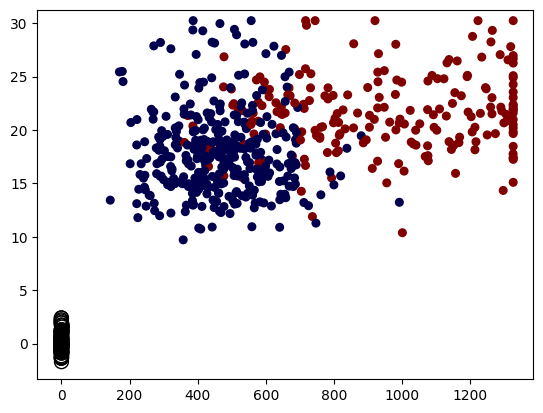

In [31]:
from svm_margin_plot import plot_svm_boundary
plot_svm_boundary(model,x,y)

The linear SVM tries to find a straight line that separates the two classes (Malignant vs Benign).
In this dataset, the separation is mostly linear but not perfect 

In [32]:
model=SVC(kernel="rbf",C=1.0,gamma="scale")
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)


0.9057017543859649

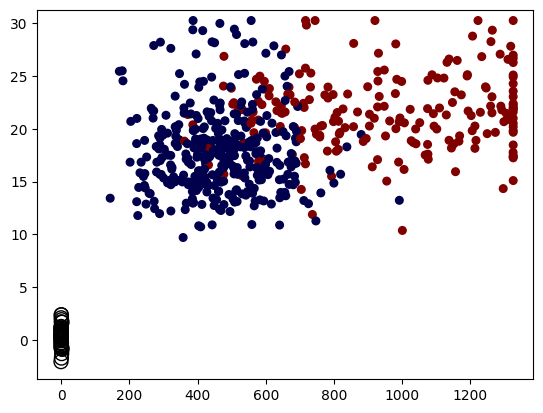

In [33]:
plot_svm_boundary(model,x,y)

In [34]:
model=SVC(kernel="poly",C=1,degree=10)
model.fit(xtrain,ytrain)
ypred=model.predict(xtest)
accuracy_score(ypred,ytest)


0.7346491228070176

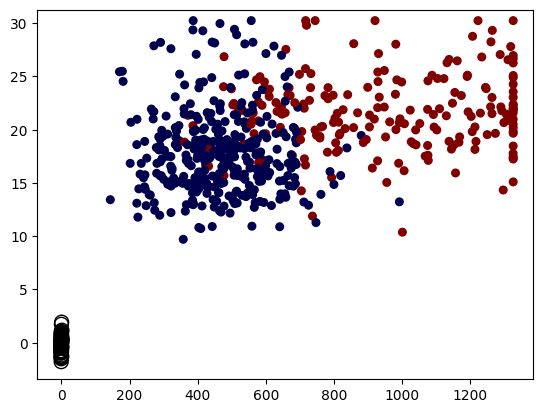

In [35]:
plot_svm_boundary(model,x,y)

In [36]:
import time

Case 1: kernel=linear, frac=10% → Train time=0.0000s, Predict time=0.0000s, Test Acc=0.908
Case 2: kernel=linear, frac=100% → Train time=0.0000s, Predict time=0.0000s, Test Acc=0.901
Case 3: kernel=rbf, frac=10% → Train time=0.0000s, Predict time=0.0000s, Test Acc=0.364
Case 4: kernel=rbf, frac=100% → Train time=0.0000s, Predict time=0.0000s, Test Acc=0.864


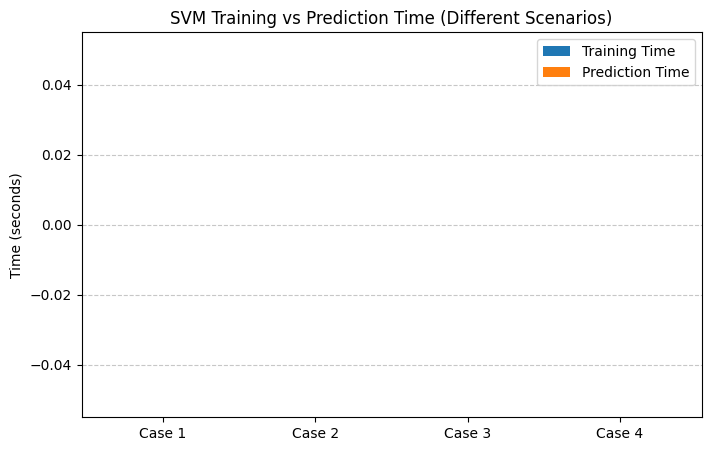

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

cases = [
    ("Case 1", 0.1, 'linear', {'C':1}),
    ("Case 2", 1.0, 'linear', {'C':1}),
    ("Case 3", 0.1, 'rbf', {'C':1, 'gamma':0.01}),
    ("Case 4", 1.0, 'rbf', {'C':1, 'gamma':0.01})
]

train_times = []
predict_times = []
accuracies = []

for name, frac, kernel, params in cases:
    n = int(len(xtrain) * frac)
    X_sub = xtrain[:n]
    y_sub = ytrain[:n]

    model = SVC(kernel=kernel, **params)

    start_train = time.time()
    model.fit(X_sub, y_sub)
    end_train = time.time()

    start_pred = time.time()
    y_pred = model.predict(xtest)
    end_pred = time.time()

    acc = accuracy_score(ytest, y_pred)
    accuracies.append(acc)
    train_times.append(end_train - start_train)
    predict_times.append(end_pred - start_pred)

    print(f"{name}: kernel={kernel}, frac={frac*100:.0f}% → "
          f"Train time={end_train - start_train:.4f}s, "
          f"Predict time={end_pred - start_pred:.4f}s, "
          f"Test Acc={acc:.3f}")


x = np.arange(len(cases))
width = 0.35

plt.figure(figsize=(8,5))
plt.bar(x - width/2, train_times, width, label='Training Time')
plt.bar(x + width/2, predict_times, width, label='Prediction Time')
plt.xticks(x, [c[0] for c in cases])
plt.ylabel("Time (seconds)")
plt.title("SVM Training vs Prediction Time (Different Scenarios)")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
